In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
dfs = pd.read_csv('maize_data.csv')

In [98]:
dfs.columns

Index(['Year', 'Country', 'Area_Harvested', 'Beg_Stocks', 'Production',
       'Imports', 'TY_Imports', 'US_Imp', 'Total_Supply', 'Exports',
       'TY_Exports', 'Feed_Dom_Consumption', 'FSI_Consumption',
       'Domestic_Consumption', 'Ending_Stocks', 'Total_Distribution', 'Yield'],
      dtype='object')

In [99]:
dfs.describe()

,Area_Harvested,Beg_Stocks,Production,Imports,TY_Imports,US_Imp,Total_Supply,Exports,TY_Exports,Feed_Dom_Consumption,FSI_Consumption,Domestic_Consumption,Ending_Stocks,Total_Distribution,Yield
count,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000,4.600000e+01,46.000000
mean,79910.826087,77216.608696,3.852573e+05,46027.282609,46234.413043,21256.804348,5.085012e+05,47661.260870,47021.347826,244375.478261,138215.739130,3.825912e+05,78248.760870,5.085012e+05,3.251304
std,77808.980900,81595.110661,4.012652e+05,49849.668526,50162.105450,24112.028823,5.277166e+05,52129.996121,51238.883921,252137.731157,147672.521066,3.970541e+05,82871.986992,5.277166e+05,1.660998
min,3200.000000,96.000000,4.000000e+03,0.000000,0.000000,0.000000,4.100000e+03,0.000000,0.000000,200.000000,3800.000000,4.000000e+03,96.000000,4.100000e+03,1.250000
25%,3850.000000,149.750000,6.925000e+03,23.750000,23.750000,0.000000,7.224750e+03,100.000000,100.000000,812.500000,5612.500000,6.900000e+03,149.750000,7.224750e+03,1.752500
50%,70103.500000,52507.000000,2.629820e+05,31803.000000,31650.500000,30.500000,3.726900e+05,31773.500000,31636.500000,183575.500000,87179.000000,2.706545e+05,52507.000000,3.726900e+05,2.835000
75%,149214.750000,142602.000000,7.166278e+05,81897.000000,81685.250000,47370.500000,9.252998e+05,83033.500000,83343.500000,479875.500000,242340.750000,7.222162e+05,142602.000000,9.252998e+05,4.887500
max,183759.000000,228610.000000,1.070510e+06,147205.000000,148335.000000,60297.000000,1.421506e+06,162407.000000,152185.000000,651316.000000,405077.000000,1.056393e+06,228610.000000,1.421506e+06,5.830000


In [100]:
dfs['Year'] = pd.to_datetime(dfs['Year'])

## Correlation matrix for Nigerian data


In [101]:
world_data = dfs[dfs['Country'] == 'World']
nigeria_data = dfs[dfs['Country'] == 'Nigeria']

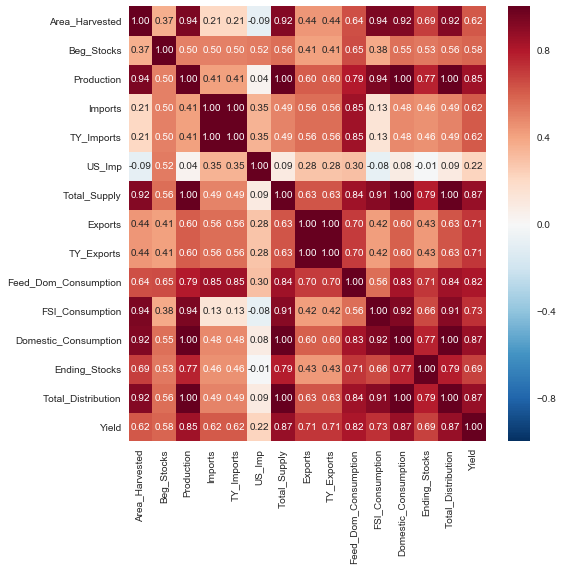

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(nigeria_data.corr(), annot=True, fmt=".2f", ax=ax)

The one thing that stands out here is the negative correlation between US Imports and area harvested 

## Correlation matrix for World data

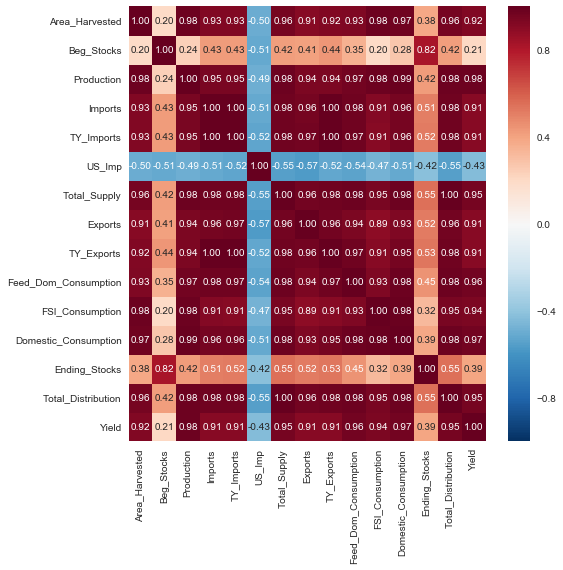

In [117]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(world_data.corr(), annot=True, fmt=".2f", ax=ax)

The matrix above makes sense, as countries harvest more of their own maize, they reduce their dependency on imports from the US. 

## Correlations between World and Nigerian production
   <ul>
   <li> Area Harvested </li>
   <li> Production </li>
   <li> Imports </li>
   <li> Yield/ Hectare </li>
   </ul>

In [103]:
result = np.corrcoef(world_data.Area_Harvested,nigeria_data.Area_Harvested)
print(result)

[[ 1.          0.53798235]
 [ 0.53798235  1.        ]]


In [104]:
result = np.corrcoef(world_data.Production,nigeria_data.Production)
print(result)

[[ 1.          0.67585689]
 [ 0.67585689  1.        ]]


In [105]:
result = np.corrcoef(world_data.Imports,nigeria_data.Imports)
print(result)

[[ 1.          0.93333367]
 [ 0.93333367  1.        ]]


In [106]:
result = np.corrcoef(world_data.Feed_Dom_Consumption,nigeria_data.Feed_Dom_Consumption)
print(result)

[[ 1.          0.90161105]
 [ 0.90161105  1.        ]]


In [107]:
result = np.corrcoef(world_data.FSI_Consumption,nigeria_data.FSI_Consumption)
print(result)

[[ 1.          0.52990401]
 [ 0.52990401  1.        ]]


In [108]:
result = np.corrcoef(world_data.Domestic_Consumption,nigeria_data.Domestic_Consumption)
print(result)

[[ 1.          0.72410432]
 [ 0.72410432  1.        ]]


In [109]:
result = np.corrcoef(world_data.Yield,nigeria_data.Yield)
print(result)

[[ 1.          0.69889466]
 [ 0.69889466  1.        ]]


Nigerian Production, Yield and Area harvested has grown much slower than the rest of the world.

In [110]:
dfp = pd.read_csv('price_monthly.csv')

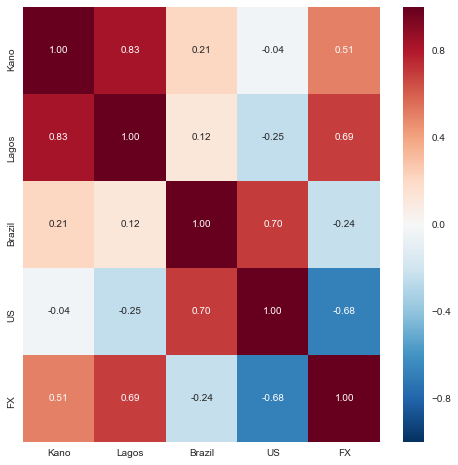

In [111]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dfp.corr(), annot=True, fmt=".2f", ax=ax)

Kano and Lagos prices move together, but these are negatively correlated with US Maize prices

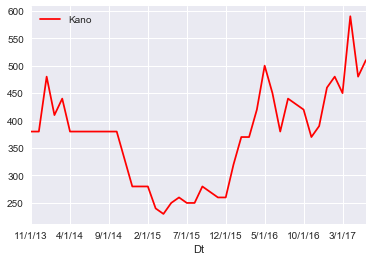

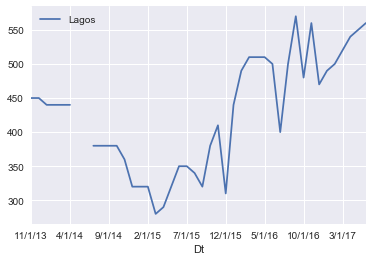

In [112]:
dfp.plot(x='Dt', y = 'Kano', color='red')
dfp.plot(x='Dt', y = 'Lagos')
plt.show()

### Resampling monthly prices to annual

In [113]:
dfp['Dt'] = pd.to_datetime(dfp.Dt)
dfp.index = pd.DatetimeIndex(dfp.Dt)
dfp.head()

,Dt,Kano,Lagos,Brazil,US,FX
Dt,,,,,,
2013-11-01,2013-11-01,380,450.0,208.75,199.16,167.14
2013-12-01,2013-12-01,380,450.0,210.00,197.34,171.40
2014-01-01,2014-01-01,480,440.0,217.25,198.42,171.71
2014-02-01,2014-02-01,410,440.0,218.67,208.85,169.45
2014-03-01,2014-03-01,440,440.0,NaN,222.14,171.52


In [114]:
dfp.resample('A').mean().head()

,Kano,Lagos,Brazil,US,FX
Dt,,,,,
2013-12-31,380.000000,450.000000,209.375000,198.250000,169.270000
2014-12-31,383.333333,396.000000,194.796667,192.892500,171.449167
2015-12-31,259.166667,332.500000,169.016667,170.104167,222.789167
2016-12-31,405.000000,495.000000,186.008889,159.316667,372.864167
2017-12-31,495.000000,526.666667,165.052500,158.915000,426.848333


Over the last 5 years, a devaluing currency along with reducing prices from Brazil and USA, has made it incresingly harder for local producers to survive